In [1]:
import pandas as pd
import numpy as np
import yaml
import seaborn as sns
import matplotlib.pyplot as plt
import os
import json
from collections import defaultdict
%matplotlib inline

In [2]:
data_dir = "../datasets/prompts_language_confusion/output"
line_level_lang_dist = defaultdict(dict)
word_level_lang_dist= defaultdict(dict)

for file in os.listdir(data_dir):
    filepath = os.path.join(data_dir, file)
    if filepath.endswith(".json"):
        with open(filepath) as f:
            data = json.load(f)

        for model, pred_lang_dict in data.items():
            
            pred_lang_line_level_ratio = pred_lang_dict["pred_lang_line_level_ratio"]
            pred_lang_word_level_ratio = pred_lang_dict["pred_lang_word_level_ratio"]

            for lang, d in pred_lang_line_level_ratio.items():
                if lang not in line_level_lang_dist[model]:
                    line_level_lang_dist[model][lang]=list()
                    
                line_level_lang_dist[model][lang].append(d)
                

            for lang,d in pred_lang_word_level_ratio.items():
                if lang not in word_level_lang_dist[model]:
                    word_level_lang_dist[model][lang]=list()
                word_level_lang_dist[model][lang].append(d)
        

In [3]:
len(word_level_lang_dist)

65239

In [4]:
len(line_level_lang_dist)

65315

In [5]:
dataframes=[]
for file in os.listdir("../datasets/prompts_language_confusion"):
    if file.endswith(".csv"):
        dataframes.append(pd.read_csv(f"../datasets/prompts_language_confusion/{file}"))
        

In [6]:
df_all = pd.concat(dataframes)

In [14]:
df_word= pd.DataFrame({"model": list(word_level_lang_dist.keys()), "pred_langs":list(word_level_lang_dist.values())})

In [15]:
df_line = pd.DataFrame({"model": list(line_level_lang_dist.keys()), "pred_langs":list(line_level_lang_dist.values())})

In [16]:
def replace_str(name):
    replacements = {"complex_prompts":"complex-prompts",
                    "dolly_human_edited":"dolly-human-edited",
                    "aya_human_annotated":"aya-human-annotated",
                    "native_prompts":"native-prompts"}
    for r,k in replacements.items():
        name = name.replace(r,k)
    return name

In [17]:
def create_multi_cols(m):
    try:
        idx, llm, task, lang, source = m.split("_")
        return idx, llm, task, lang, source
    except Exception as msg:
        print(msg, m)
    

In [23]:
df_word["name"]=df_word["model"].apply(replace_str)

In [24]:
df_word[["idx", "LLM", "task", "lang", "source"]]= df_word["name"].str.split("_", expand=True)

In [18]:
df_line["name"]=df_line["model"].apply(replace_str)

In [19]:
df_line[["idx", "LLM", "task", "lang", "source"]]= df_line["name"].str.split("_", expand=True)

In [26]:
df_word.to_csv("../datasets/prompts_language_confusion/lang2dist/word_level.csv",index=False)

In [27]:
df_line.to_csv("../datasets/prompts_language_confusion/lang2dist/line_level.csv",index=False)

In [62]:
df_line_mono=df_line[df_line["task"]=="monolingual"]
df_line_cross=df_line[df_line["task"]=="crosslingual"]

In [70]:
lang_clusters_mono=[]
lang_clusters_multi=[]

for pred_langs, lang in zip(df_line_mono["pred_langs"], df_line_mono["lang"]):
    langs = list(pred_langs.keys())+[lang]
    lang_clusters_mono.append(langs)


for pred_langs, lang in zip(df_line_cross["pred_langs"], df_line_cross["lang"]):
    langs = list(pred_langs.keys())+[lang]
    lang_clusters_multi.append(langs)
    

In [74]:
len(lang_clusters_mono)

23970

In [76]:
counter_mono= defaultdict(int)
for k in lang_clusters_mono:
    counter_mono["_".join(k)]+=1

In [78]:
counter_multi= defaultdict(int)
for k in lang_clusters_multi:
    counter_multi["_".join(k)]+=1

In [81]:
sorted(counter_multi.items(), key=lambda x:x[1], reverse=True)

[('fra_fr', 1723),
 ('spa_es', 1712),
 ('por_pt', 1639),
 ('ita_it', 1621),
 ('deu_de', 1591),
 ('rus_ru', 1519),
 ('tur_tr', 1477),
 ('vie_vi', 1420),
 ('zho_zh', 1383),
 ('ara_ar', 1297),
 ('jpn_ja', 1251),
 ('kor_ko', 1249),
 ('hin_hi', 1206),
 ('ind_id', 1015),
 ('eng_ko', 928),
 ('eng_ar', 918),
 ('eng_zh', 902),
 ('eng_ja', 894),
 ('eng_hi', 872),
 ('eng_ru', 793),
 ('eng_tr', 788),
 ('eng_vi', 784),
 ('eng_id', 721),
 ('eng_de', 700),
 ('eng_it', 662),
 ('eng_pt', 654),
 ('eng_es', 630),
 ('eng_fr', 621),
 ('eng_ara_ar', 335),
 ('eng_vie_vi', 329),
 ('eng_deu_de', 295),
 ('eng_tur_tr', 286),
 ('eng_ita_it', 261),
 ('ind_msa_id', 243),
 ('eng_fra_fr', 242),
 ('eng_rus_ru', 242),
 ('eng_kor_ko', 241),
 ('eng_jpn_ja', 209),
 ('eng_hin_hi', 208),
 ('eng_zho_zh', 202),
 ('eng_por_pt', 171),
 ('eng_spa_es', 167),
 ('eng_ind_id', 164),
 ('msa_ind_id', 154),
 ('eng_unknown_ko', 137),
 ('msa_id', 109),
 ('eng_unknown_zh', 99),
 ('mar_hin_hi', 98),
 ('eng_unknown_ja', 98),
 ('vie_eng_vi',

In [77]:
counter_mono

defaultdict(int,
            {'ara_ar': 2002,
             'ara_fas_ar': 11,
             'deu_de': 798,
             'fra_deu_de': 1,
             'eng_deu_unknown_de': 1,
             'deu_fas_dan_de': 1,
             'unknown_deu_de': 5,
             'deu_unknown_de': 5,
             'eng_deu_de': 10,
             'fas_msa_deu_de': 1,
             'eng_en': 1809,
             'eng_unknown_en': 73,
             'eng_fra_en': 65,
             'spa_es': 2563,
             'eng_spa_es': 27,
             'unknown_spa_es': 18,
             'spa_unknown_es': 82,
             'spa_deu_por_es': 2,
             'spa_fra_por_es': 1,
             'spa_por_es': 49,
             'fra_fr': 2608,
             'eng_fra_unknown_tsn_fr': 1,
             'fra_eng_fr': 76,
             'ind_id': 372,
             'ind_msa_id': 104,
             'msa_ind_id': 77,
             'ind_unknown_msa_id': 7,
             'unknown_ind_id': 12,
             'msa_id': 68,
             'ind_unknown_eng_msa_id': 1,
 

In [58]:
df_line[df_line["pred_langs"].str.len()>1]

,model,pred_langs,name,idx,LLM,task,lang,source
16,16_command-r_monolingual_ar_okapi,"{'ara': [0.67], 'fas': [0.33]}",16_command-r_monolingual_ar_okapi,16,command-r,monolingual,ar,okapi
129,29_command-r_monolingual_de_okapi,"{'fra': [0.33], 'deu': [0.67]}",29_command-r_monolingual_de_okapi,29,command-r,monolingual,de,okapi
135,35_command-r_monolingual_de_okapi,"{'eng': [0.11], 'deu': [0.78], 'unknown': [0.11]}",35_command-r_monolingual_de_okapi,35,command-r,monolingual,de,okapi
147,47_command-r_monolingual_de_okapi,"{'deu': [0.71], 'fas': [0.14], 'dan': [0.14]}",47_command-r_monolingual_de_okapi,47,command-r,monolingual,de,okapi
149,49_command-r_monolingual_de_okapi,"{'unknown': [0.25], 'deu': [0.75]}",49_command-r_monolingual_de_okapi,49,command-r,monolingual,de,okapi
...,...,...,...,...,...,...,...,...
65309,94_llama-3-instruct_crosslingual_vi_sharegpt,"{'eng': [0.5], 'vie': [0.5]}",94_llama-3-instruct_crosslingual_vi_sharegpt,94,llama-3-instruct,crosslingual,vi,sharegpt
65310,95_llama-3-instruct_crosslingual_vi_sharegpt,"{'eng': [0.2], 'vie': [0.8]}",95_llama-3-instruct_crosslingual_vi_sharegpt,95,llama-3-instruct,crosslingual,vi,sharegpt
65311,96_llama-3-instruct_crosslingual_vi_sharegpt,"{'eng': [0.17], 'vie': [0.83]}",96_llama-3-instruct_crosslingual_vi_sharegpt,96,llama-3-instruct,crosslingual,vi,sharegpt
65312,97_llama-3-instruct_crosslingual_vi_sharegpt,"{'eng': [0.2], 'vie': [0.8]}",97_llama-3-instruct_crosslingual_vi_sharegpt,97,llama-3-instruct,crosslingual,vi,sharegpt


In [7]:
word_level_lang_dist

defaultdict(dict,
            {'0_command-r_monolingual_ar_okapi': {'ara': [0.9],
              'urd': [0.02],
              'fas': [0.08]},
             '1_command-r_monolingual_ar_okapi': {'ara': [0.98],
              'urd': [0.02]},
             '2_command-r_monolingual_ar_okapi': {'ara': [0.95],
              'urd': [0.02],
              'fas': [0.02]},
             '3_command-r_monolingual_ar_okapi': {'ara': [0.96],
              'fas': [0.04]},
             '4_command-r_monolingual_ar_okapi': {'ara': [0.91],
              'fas': [0.09]},
             '5_command-r_monolingual_ar_okapi': {'ara': [0.98],
              'fas': [0.02]},
             '6_command-r_monolingual_ar_okapi': {'ara': [1.0]},
             '7_command-r_monolingual_ar_okapi': {'ara': [0.94],
              'fas': [0.06]},
             '8_command-r_monolingual_ar_okapi': {'ara': [0.98],
              'fas': [0.02]},
             '9_command-r_monolingual_ar_okapi': {'ara': [0.98],
              'fas': [0.02]},
     

In [8]:
langs = []
langs += list(line_level_lang_dist.keys())
len(langs)

90

In [9]:
langs += list(word_level_lang_dist.keys())

In [11]:
len(set(langs))

131

In [17]:
with open("../datasets/prompts_language_confusion/prompt_langs_word_level.json", "w") as f:
    json.dump(word_level_lang_dist, f)

In [16]:
with open("../datasets/prompts_language_confusion/prompt_langs_line_level.json", "w") as f:
    json.dump(line_level_lang_dist, f)

In [13]:
with open("../datasets/prompts_language_confusion/prompt_langs.json", "w") as f:
    json.dump(list(set(langs)), f)

In [20]:
line_level_dist = {x:len(v) for x,v in line_level_lang_dist.items()}
word_level_dist = {x:len(v) for x,v in word_level_lang_dist.items()}


In [25]:
# line distribution should be more accurate
for lang , dists in sorted(line_level_dist.items(), key=lambda x: x[1], reverse=True):
    print(lang, dists)

eng 25254
fra 6762
spa 5508
por 4218
unknown 4042
ara 4025
zho 3342
deu 3269
ita 3241
rus 2945
tur 2839
vie 2698
ind 2611
jpn 2435
hin 2435
kor 2359
msa 1065
mar 382
nld 219
afr 202
epo 189
gle 160
lug 158
yor 130
cat 111
tgl 106
mri 106
sot 104
bul 68
fas 67
fin 67
dan 66
swa 66
lit 49
ron 46
pol 45
tso 44
ces 42
sna 41
ukr 38
swe 31
eus 30
mon 29
nno 27
eml 26
aze 25
mkd 23
cym 22
ceb 22
slk 21
tsn 18
hun 18
srp 17
est 16
som 16
bel 15
xho 14
isl 13
nob 11
ell 6
bos 6
kaz 6
sqi 6
fry 5
nor 5
uzb 4
urd 4
slv 4
tha 4
glg 4
lav 4
new 4
lat 3
als 3
azb 2
hrv 2
zul 2
san 2
ile 1
nep 1
mal 1
jav 1
nds 1
tat 1
ina 1
war 1
jbo 1
kir 1
vol 1
khm 1


In [146]:
df_langs = pd.read_csv("../datasets/languages/languoid.csv")

In [147]:
langs= ["English", "French", "German", "Spanish", "Portuguese", "Italian", "Japanese", "Korean", "Mandarin Chinese", "Arabic", "Turkish", 
        "Hindi", "Russian", "Standard Indonesian", "Vietnamese"]
len(langs)

15

In [148]:
name2id = dict(zip(df_langs["name"], df_langs["id"]))

In [149]:
lang_idx = [name2id.get(x,x) for x in langs]

In [150]:
id2lang = {name2id[name]: name for name in langs}

In [151]:
id2lang

{'stan1293': 'English',
 'stan1290': 'French',
 'stan1295': 'German',
 'stan1288': 'Spanish',
 'port1283': 'Portuguese',
 'ital1282': 'Italian',
 'nucl1643': 'Japanese',
 'kore1280': 'Korean',
 'mand1415': 'Mandarin Chinese',
 'arab1395': 'Arabic',
 'nucl1301': 'Turkish',
 'hind1269': 'Hindi',
 'russ1263': 'Russian',
 'indo1316': 'Standard Indonesian',
 'viet1252': 'Vietnamese'}

In [152]:
len(lang_idx)

15

In [155]:
df_wals = pd.read_csv("../datasets/data_for_graph/WALS/wals_lang2features.csv")

In [156]:
df_gb = pd.read_csv("../datasets/data_for_graph/Grambank/grambank_lang2features.csv")

In [55]:
glottocode2iso3["stan1295"]

'deu'

In [54]:
df_langs[df_langs["iso639P3code"]=="deu"]

,id,family_id,parent_id,name,bookkeeping,level,latitude,longitude,iso639P3code,description,markup_description,child_family_count,child_language_count,child_dialect_count,country_ids
21955,stan1295,indo1319,glob1243,German,False,language,48.649,12.4676,deu,NaN,NaN,0,0,3,AT BE CH CZ DE DK FR HU IT LI LU NL PL RO SI SK


In [60]:
"deu" in df_langs["iso639P3code"].tolist()

True

# Grambank features Selection

In [157]:
df_gb_langs = df_gb[df_gb["Lang_ID"].isin(lang_idx)]

In [160]:
id2lang

{'stan1293': 'English',
 'stan1290': 'French',
 'stan1295': 'German',
 'stan1288': 'Spanish',
 'port1283': 'Portuguese',
 'ital1282': 'Italian',
 'nucl1643': 'Japanese',
 'kore1280': 'Korean',
 'mand1415': 'Mandarin Chinese',
 'arab1395': 'Arabic',
 'nucl1301': 'Turkish',
 'hind1269': 'Hindi',
 'russ1263': 'Russian',
 'indo1316': 'Standard Indonesian',
 'viet1252': 'Vietnamese'}

In [161]:
df_gb_langs["Language"]= df_gb_langs["Lang_ID"].map(id2lang)

/var/folders/bj/qp6k2wl11h5gpn8j4hg0tgf40000gn/T/ipykernel_4284/2872540435.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_gb_langs["Language"]= df_gb_langs["Lang_ID"].map(id2lang)


In [163]:
df_gb_langs

,Lang_ID,GB020,GB021,GB022,GB023,GB024,GB025,GB026,GB027,GB028,...,GB422,GB430,GB431,GB432,GB433,GB519,GB520,GB521,GB522,Language
743,hind1269,0,0,0,0,1,1,-1,1,0,...,0,0,0,0,0,0,0,0,0,Hindi
803,indo1316,0,0,0,0,3,2,0,1,1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,Standard Indonesian
825,ital1282,1,1,1,0,1,1,0,1,0,...,0,0,0,0,0,0,0,0,1,Italian
995,kore1280,0,0,0,0,2,1,-1,1,0,...,1,0,0,1,0,0,0,0,1,Korean
1231,mand1415,0,0,0,0,1,1,0,1,1,...,0,0,0,0,0,1,1,0,1,Mandarin Chinese
1552,nucl1301,0,0,1,0,1,1,1,0,0,...,0,0,0,1,1,0,0,0,1,Turkish
1573,nucl1643,0,0,0,0,1,1,0,0,0,...,1,0,0,1,0,1,0,0,1,Japanese
1714,port1283,1,1,1,0,1,1,0,1,0,...,0,0,0,0,0,0,0,0,1,Portuguese
1781,russ1263,0,0,0,0,1,1,1,1,0,...,0,0,0,1,1,1,0,0,0,Russian
1948,stan1290,1,1,1,0,1,3,0,0,0,...,0,0,0,0,0,0,0,0,0,French


In [162]:
len(df_gb_langs)

12

### threshold 0.75 for languages coverage by features

In [164]:
gb_features = [x for x in df_gb.columns if x.startswith("GB")]

In [165]:
tot_feats= len(gb_features)
print(f"total features {tot_feats}")
perc = 0.75
cols_gb=[]
for col in gb_features:
    no_data = df_gb_langs[col].to_list().count(-1)
    if (tot_feats-no_data)>=(perc*tot_feats):
        # print(col, no_data)
        cols_gb.append(col)
    

total features 195


In [166]:
len(cols_gb)

195

In [167]:
df_gb_langs.to_csv("../datasets/prompts_language_confusion/gb_features.csv",index=False)

# WALS FEATURES FOR INVERSION RESULTS

In [168]:
df_wals = df_wals[df_wals["Glottocode"].isin(lang_idx)]

In [169]:
df_wals

,Glottocode,Family,Genus,Consonant Inventories,Vowel Quality Inventories,Consonant-Vowel Ratio,Voicing in Plosives and Fricatives,Voicing and Gaps in Plosive Systems,Uvular Consonants,Glottalized Consonants,...,NegSOV Order,SNegOV Order,SONegV Order,SOVNeg Order,The Position of Negative Morphemes in Verb-Initial Languages,Double negation in verb-initial languages,Verb-Initial with Preverbal Negative,Verb-Initial with Negative that is Immediately Postverbal or between Subject and Object,Verb-Initial with Clause-Final Negative,The Position of Negative Morphemes in Object-Initial Languages
131,nucl1301,39,59,0,1,0,3,1,-1,1,...,0,0,0,4,-1,-1,-1,-1,-1,-1
658,ital1282,22,135,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
681,nucl1643,136,306,1,0,0,3,1,2,1,...,0,0,0,4,-1,-1,-1,-1,-1,-1
710,port1283,22,135,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
801,russ1263,22,33,2,0,2,3,1,-1,1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
811,stan1295,22,158,0,1,4,3,1,2,1,...,0,0,1,1,-1,-1,-1,-1,-1,-1
920,stan1293,22,158,0,1,4,3,1,-1,1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
1091,hind1269,22,50,3,0,3,3,1,-1,1,...,0,0,1,1,-1,-1,-1,-1,-1,-1
1327,viet1252,5,447,0,1,4,2,0,-1,4,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
1564,stan1290,22,135,0,1,4,3,1,2,1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1


In [170]:
df_wals["Language"]= df_wals["Glottocode"].map(id2lang)

In [171]:
features = df_wals.columns.tolist()

In [172]:
features.remove("Glottocode")
features.remove("Language")

In [173]:
features

['Family',
 'Genus',
 'Consonant Inventories',
 'Vowel Quality Inventories',
 'Consonant-Vowel Ratio',
 'Voicing in Plosives and Fricatives',
 'Voicing and Gaps in Plosive Systems',
 'Uvular Consonants',
 'Glottalized Consonants',
 'Lateral Consonants',
 'The Velar Nasal',
 'Vowel Nasalization',
 'Nasal Vowels in West Africa',
 'Front Rounded Vowels',
 'Syllable Structure',
 'Tone',
 'Fixed Stress Locations',
 'Weight-Sensitive Stress',
 'Weight Factors in Weight-Sensitive Stress Systems',
 'Rhythm Types',
 'Absence of Common Consonants',
 'Presence of Uncommon Consonants',
 'Fusion of Selected Inflectional Formatives',
 'Exponence of Selected Inflectional Formatives',
 'Exponence of Tense-Aspect-Mood Inflection',
 'Inflectional Synthesis of the Verb',
 'Locus of Marking in the Clause',
 'Locus of Marking in Possessive Noun Phrases',
 'Locus of Marking: Whole-language Typology',
 'Zero Marking of A and P Arguments',
 'Prefixing vs. Suffixing in Inflectional Morphology',
 'Reduplication

In [174]:
tot_feats= len(features)
print(f"total features {tot_feats}")
perc = 0.25
for i, row in df_wals.iterrows():
    no_data = row.to_list().count(-1)
    if (tot_feats-no_data)<(perc*tot_feats):
        print(i, no_data)
    else:
        print(i, no_data)

total features 194
131 44
658 113
681 47
710 135
801 42
811 38
920 38
1091 54
1327 57
1564 37
1711 50
1885 46
2301 42


# The features that are present in most of the relevant languages
- threshold =0.75

In [175]:
print(len(df_wals))
langs_exist = len(df_wals)
cols = []
for col in df_wals.columns:
    no_data = df_wals[col].to_list().count(-1)
    if (langs_exist - no_data) >= (0.75*langs_exist):
    
        print(col, langs_exist - no_data)
        cols.append(col)

13
Glottocode 13
Family 13
Genus 13
Consonant Inventories 11
Vowel Quality Inventories 11
Consonant-Vowel Ratio 11
Voicing in Plosives and Fricatives 11
Voicing and Gaps in Plosive Systems 11
Glottalized Consonants 11
Lateral Consonants 11
The Velar Nasal 11
Vowel Nasalization 11
Syllable Structure 11
Tone 11
Fixed Stress Locations 10
Weight-Sensitive Stress 10
Weight Factors in Weight-Sensitive Stress Systems 10
Absence of Common Consonants 11
Fusion of Selected Inflectional Formatives 11
Exponence of Selected Inflectional Formatives 11
Exponence of Tense-Aspect-Mood Inflection 11
Inflectional Synthesis of the Verb 11
Locus of Marking in the Clause 11
Locus of Marking in Possessive Noun Phrases 11
Locus of Marking: Whole-language Typology 11
Zero Marking of A and P Arguments 11
Prefixing vs. Suffixing in Inflectional Morphology 13
Reduplication 13
Case Syncretism 11
Syncretism in Verbal Person/Number Marking 11
Coding of Nominal Plurality 13
Occurrence of Nominal Plurality 12
Pluralit

In [176]:
df_wals[cols].to_csv("../datasets/prompts_language_confusion/wals_features.csv")

In [134]:
df_wals_cols = df_wals[cols]

In [135]:
df_wals

,Glottocode,Family,Genus,Consonant Inventories,Vowel Quality Inventories,Consonant-Vowel Ratio,Voicing in Plosives and Fricatives,Voicing and Gaps in Plosive Systems,Uvular Consonants,Glottalized Consonants,...,NegSOV Order,SNegOV Order,SONegV Order,SOVNeg Order,The Position of Negative Morphemes in Verb-Initial Languages,Double negation in verb-initial languages,Verb-Initial with Preverbal Negative,Verb-Initial with Negative that is Immediately Postverbal or between Subject and Object,Verb-Initial with Clause-Final Negative,The Position of Negative Morphemes in Object-Initial Languages
131,nucl1301,39,59,0,1,0,3,1,-1,1,...,0,0,0,4,-1,-1,-1,-1,-1,-1
658,ital1282,22,135,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
681,nucl1643,136,306,1,0,0,3,1,2,1,...,0,0,0,4,-1,-1,-1,-1,-1,-1
710,port1283,22,135,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
801,russ1263,22,33,2,0,2,3,1,-1,1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
811,stan1295,22,158,0,1,4,3,1,2,1,...,0,0,1,1,-1,-1,-1,-1,-1,-1
920,stan1293,22,158,0,1,4,3,1,-1,1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
1091,hind1269,22,50,3,0,3,3,1,-1,1,...,0,0,1,1,-1,-1,-1,-1,-1,-1
1327,viet1252,5,447,0,1,4,2,0,-1,4,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
1564,stan1290,22,135,0,1,4,3,1,2,1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1


In [136]:
df_wals_cols.index= df_wals_cols["Glottocode"]

In [137]:
df_wals_cols = df_wals_cols.drop(columns=["Glottocode"])

In [138]:
df = df_wals_cols.T

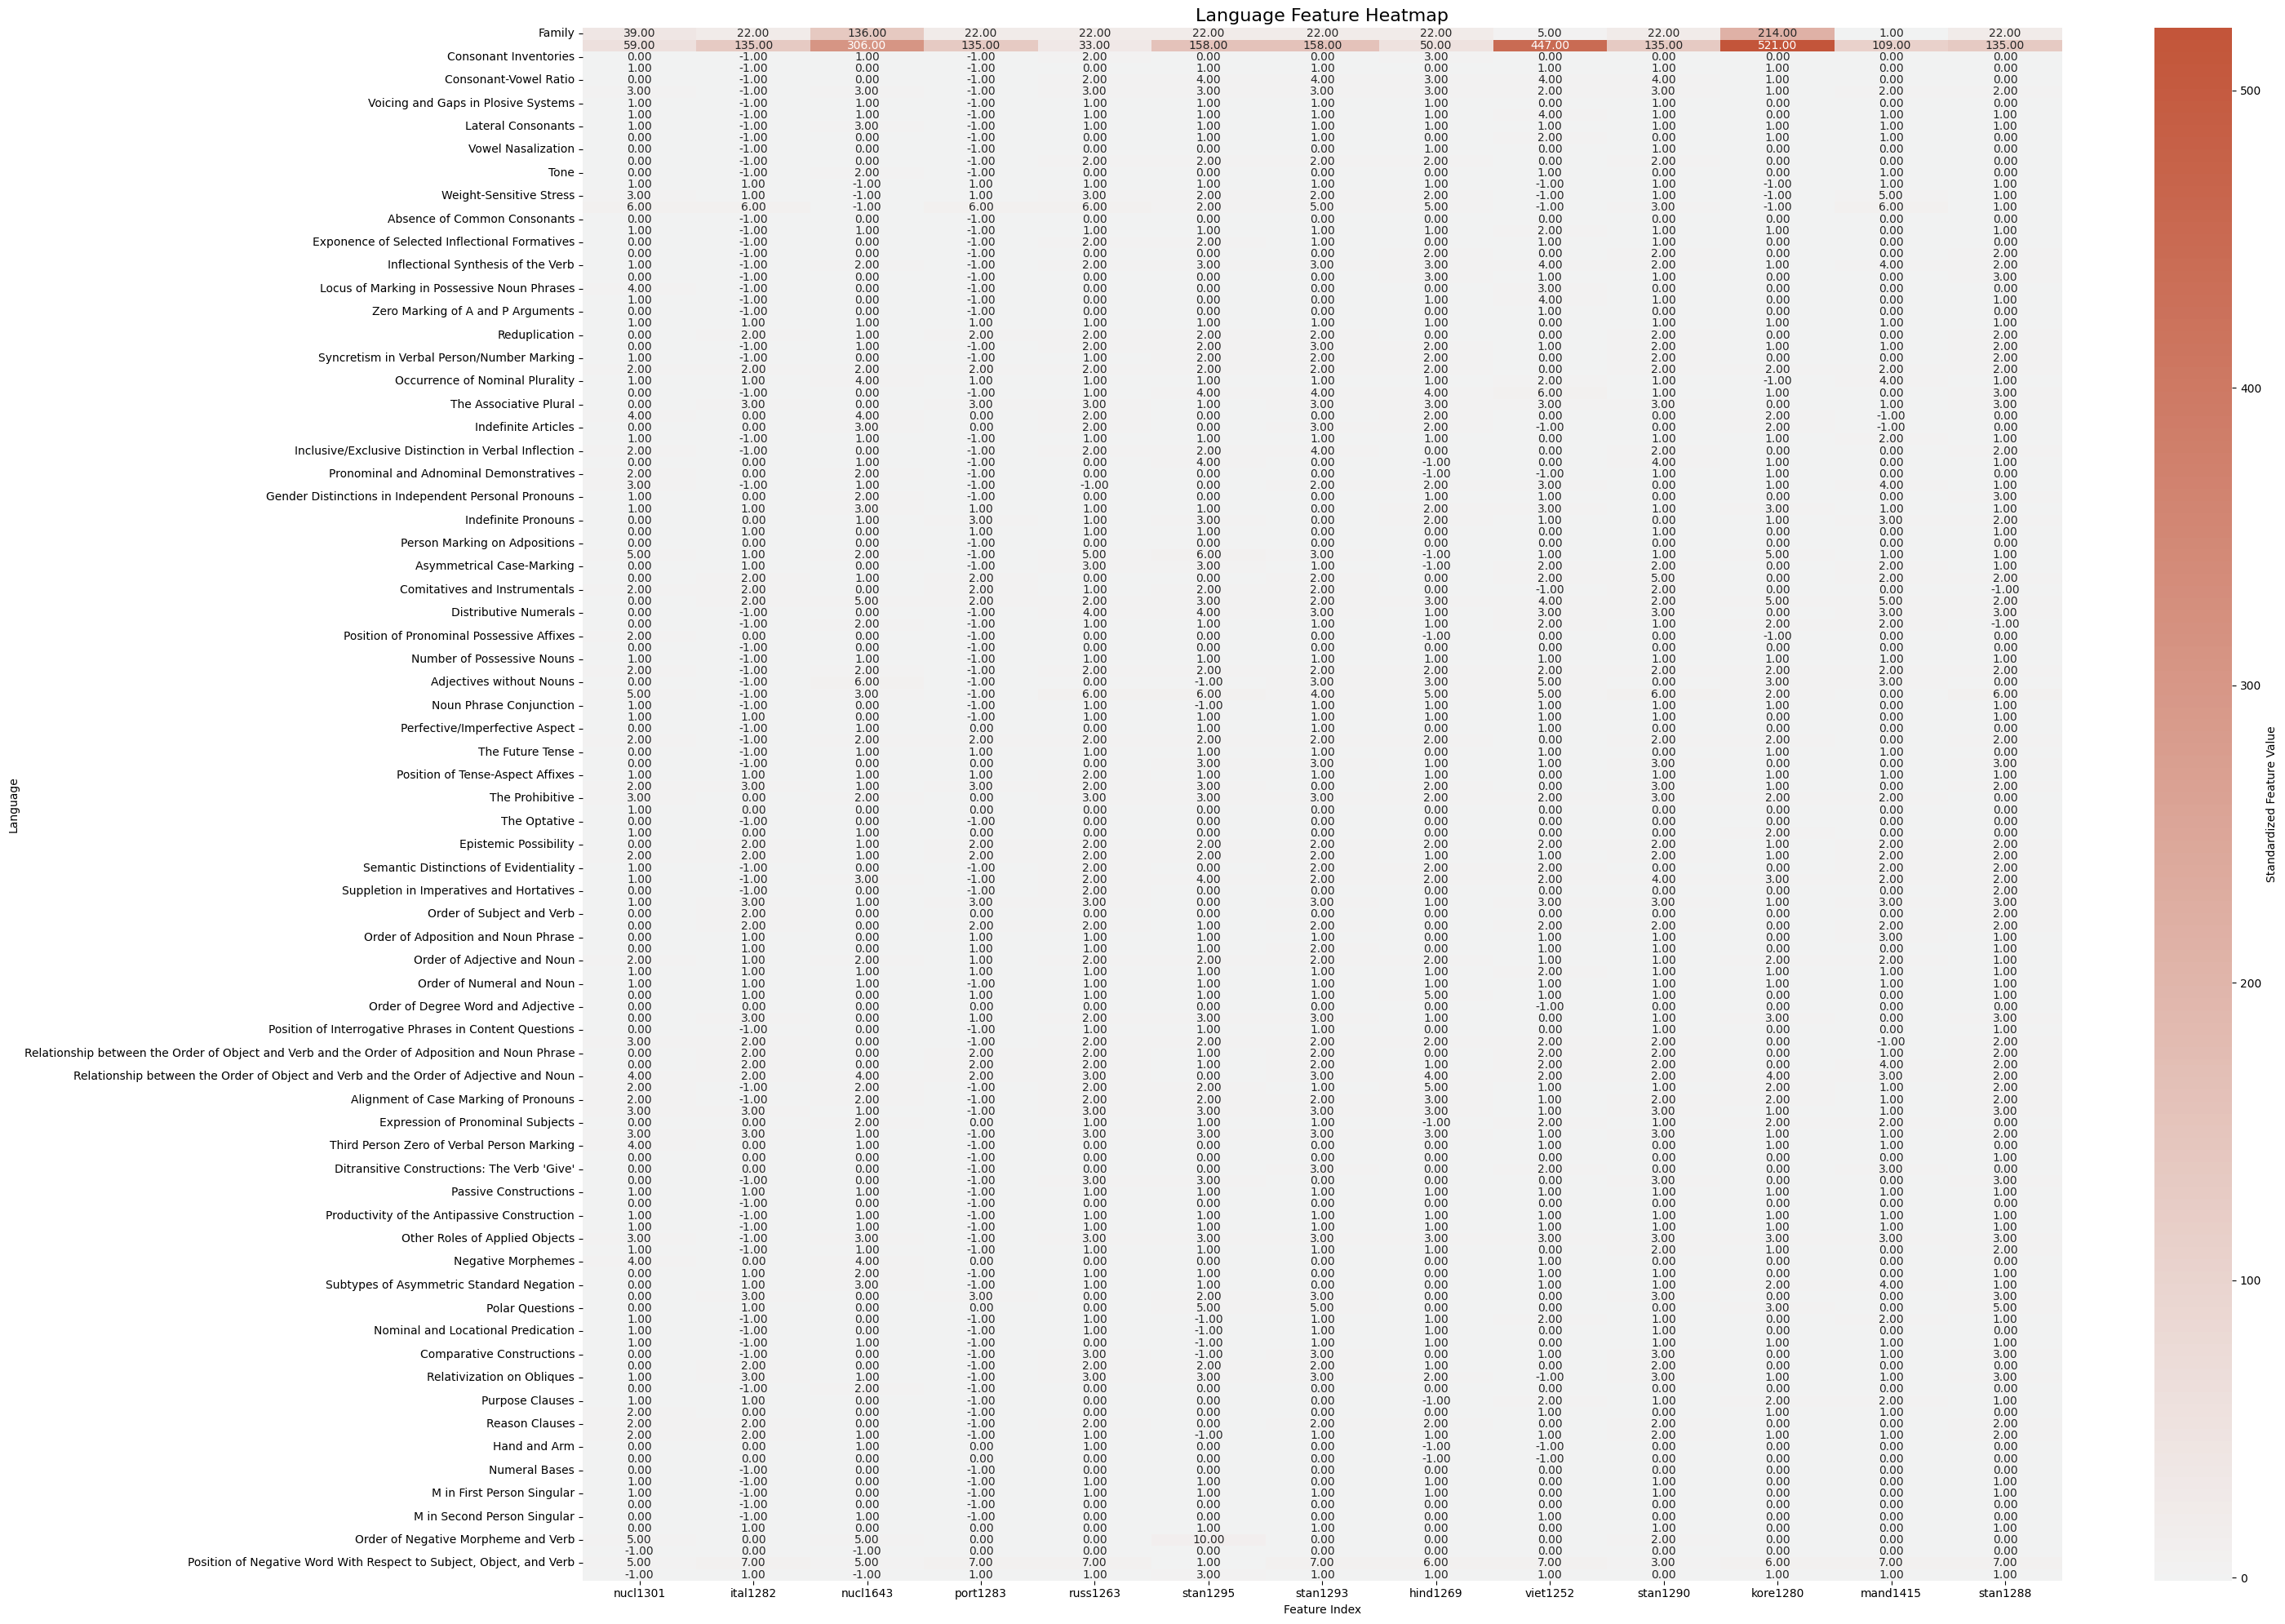


Feature Statistics:
                                                          mean         std  \
Family                                               43.923077   60.985601   
Genus                                               183.153846  150.159829   
Consonant Inventories                                 0.307692    1.109400   
Vowel Quality Inventories                             0.307692    0.751068   
Consonant-Vowel Ratio                                 1.538462    2.025479   
...                                                        ...         ...   
Tea                                                   0.384615    0.506370   
Order of Negative Morpheme and Verb                   1.692308    3.119418   
Preverbal Negative Morphemes                         -0.153846    0.375534   
Position of Negative Word With Respect to Subje...    5.769231    1.877669   
Position of negative words relative to beginnin...    0.769231    1.012739   

                                          

In [139]:
plt.figure(figsize=(30, 20))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(df, 
            cmap=cmap, 
            center=0,
            annot=True,
            fmt='.2f',
            cbar_kws={'label': 'Standardized Feature Value'})

# Customize the plot
plt.xlabel('Feature Index')
plt.ylabel('Language')
plt.title('Language Feature Heatmap', fontsize=16)
plt.tight_layout()

# Show the plot
plt.show()

# Print feature statistics
print("\nFeature Statistics:")
print(df.T.describe().T[['mean', 'std', 'min', 'max']])

In [140]:
df

Glottocode,nucl1301,ital1282,nucl1643,port1283,russ1263,stan1295,stan1293,hind1269,viet1252,stan1290,kore1280,mand1415,stan1288
Family,39,22,136,22,22,22,22,22,5,22,214,1,22
Genus,59,135,306,135,33,158,158,50,447,135,521,109,135
Consonant Inventories,0,-1,1,-1,2,0,0,3,0,0,0,0,0
Vowel Quality Inventories,1,-1,0,-1,0,1,1,0,1,1,1,0,0
Consonant-Vowel Ratio,0,-1,0,-1,2,4,4,3,4,4,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
Tea,0,1,0,0,0,1,1,0,0,1,0,0,1
Order of Negative Morpheme and Verb,5,0,5,0,0,10,0,0,0,2,0,0,0
Preverbal Negative Morphemes,-1,0,-1,0,0,0,0,0,0,0,0,0,0
"Position of Negative Word With Respect to Subject, Object, and Verb",5,7,5,7,7,1,7,6,7,3,6,7,7


In [141]:
id2lang

{'stan1293': 'English',
 'stan1290': 'French',
 'stan1295': 'German',
 'stan1288': 'Spanish',
 'port1283': 'Portuguese',
 'ital1282': 'Italian',
 'nucl1643': 'Japanese',
 'kore1280': 'Korean',
 'mand1415': 'Mandarin Chinese',
 'arab1395': 'Arabic',
 'nucl1301': 'Turkish',
 'hind1269': 'Hindi',
 'russ1263': 'Russian',
 'indo1316': 'Standard Indonesian',
 'viet1252': 'Vietnamese'}

In [142]:
df_t= df.T

In [143]:
df_t.index = df_t.index.map(id2lang)

In [144]:
df_t.index

Index(['Turkish', 'Italian', 'Japanese', 'Portuguese', 'Russian', 'German',
       'English', 'Hindi', 'Vietnamese', 'French', 'Korean',
       'Mandarin Chinese', 'Spanish'],
      dtype='object', name='Glottocode')

/var/folders/bj/qp6k2wl11h5gpn8j4hg0tgf40000gn/T/ipykernel_4284/2128077145.py:26: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.annotate(txt, (pca_df['PC1'][i], pca_df['PC2'][i]), xytext=(5, 5), textcoords='offset points')


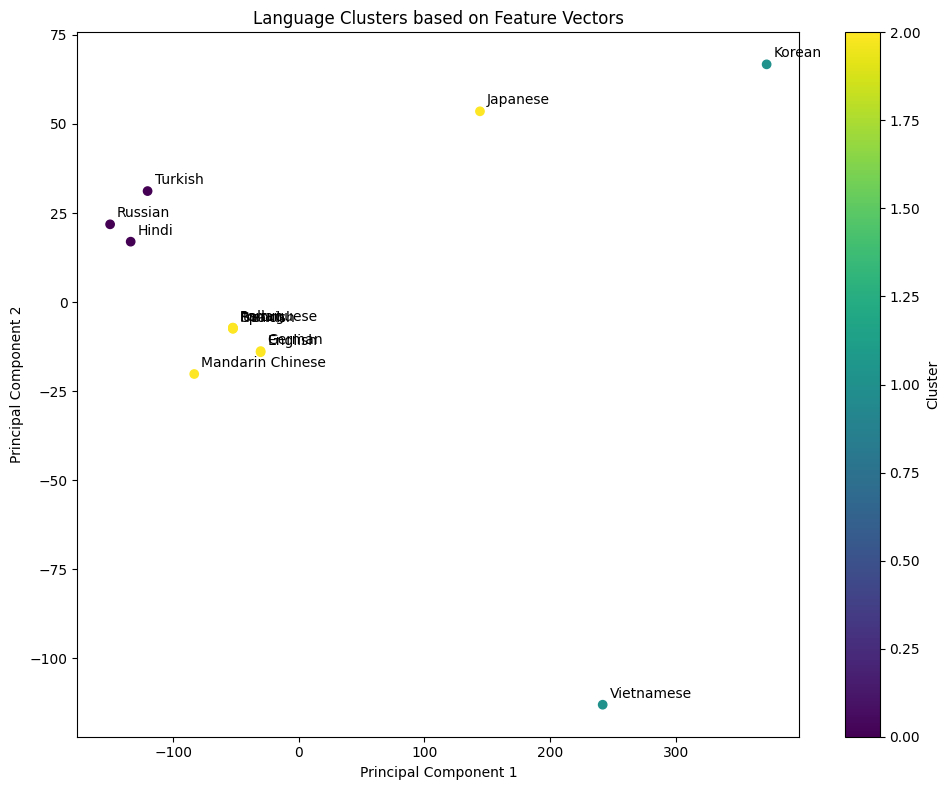


Cluster Assignments:
nucl1301: Turkish Cluster 0
ital1282: Italian Cluster 2
nucl1643: Japanese Cluster 2
port1283: Portuguese Cluster 2
russ1263: Russian Cluster 0
stan1295: German Cluster 2
stan1293: English Cluster 2
hind1269: Hindi Cluster 0
viet1252: Vietnamese Cluster 1
stan1290: French Cluster 2
kore1280: Korean Cluster 1
mand1415: Mandarin Chinese Cluster 2
stan1288: Spanish Cluster 2

Feature Importance (based on KMeans cluster centers):
                                                    Cluster 0  Cluster 1  \
Family                                              27.666667      109.5   
Genus                                               47.333333      484.0   
Consonant Inventories                                1.666667        0.0   
Vowel Quality Inventories                            0.333333        1.0   
Consonant-Vowel Ratio                                1.666667        2.5   
...                                                       ...        ...   
Tea             

In [145]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

n_clusters = 3  # You can adjust this number
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
clusters = kmeans.fit_predict(df_t)

# Perform PCA for visualization
pca = PCA(n_components=2)
pca_result = pca.fit_transform(df_t)

# Create a DataFrame with PCA results
pca_df = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2'], index=df_t.index)
pca_df['Cluster'] = clusters

# Visualize the clusters
plt.figure(figsize=(10, 8))
scatter = plt.scatter(pca_df['PC1'], pca_df['PC2'], c=pca_df['Cluster'], cmap='viridis')
plt.title('Language Clusters based on Feature Vectors')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

# Add language labels to the points
for i, txt in enumerate(pca_df.index):
    plt.annotate(txt, (pca_df['PC1'][i], pca_df['PC2'][i]), xytext=(5, 5), textcoords='offset points')

plt.colorbar(scatter, label='Cluster')
plt.tight_layout()
plt.show()

# Print cluster assignments
print("\nCluster Assignments:")
for lang, cluster in zip(df.T.index, clusters):
    print(f"{lang}: {id2lang[lang]} Cluster {cluster}")

# Print feature importance
print("\nFeature Importance (based on KMeans cluster centers):")
feature_importance = pd.DataFrame(kmeans.cluster_centers_.T, index=df.T.columns, columns=[f'Cluster {i}' for i in range(n_clusters)])
print(feature_importance)


In [91]:
df_gb_langs

,Lang_ID,GB020,GB021,GB022,GB023,GB024,GB025,GB026,GB027,GB028,...,GB421,GB422,GB430,GB431,GB432,GB433,GB519,GB520,GB521,GB522
743,hind1269,0,0.0,0,0,1,1,NaN,1.0,0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
803,indo1316,0,0.0,0,0,3,2,0.0,1.0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
825,ital1282,1,1.0,1,0,1,1,0.0,1.0,0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
995,kore1280,0,0.0,0,0,2,1,NaN,1.0,0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1231,mand1415,0,0.0,0,0,1,1,0.0,1.0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0
1552,nucl1301,0,0.0,1,0,1,1,1.0,0.0,0,...,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
1573,nucl1643,0,0.0,0,0,1,1,0.0,0.0,0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
1714,port1283,1,1.0,1,0,1,1,0.0,1.0,0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1781,russ1263,0,0.0,0,0,1,1,1.0,1.0,0,...,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0
1948,stan1290,1,1.0,1,0,1,3,0.0,0.0,0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [92]:
df_gb_langs.index=df_gb_langs["Lang_ID"]

In [93]:
df_gb_langs = df_gb_langs.drop(columns=[ "Lang_ID"])

In [94]:
len(df_gb_langs)

12

In [99]:
df_gb_langs = df_gb_langs.fillna(-1)

In [122]:
df_gb_langs.index = df_gb_langs.index.map(id2lang)

/var/folders/bj/qp6k2wl11h5gpn8j4hg0tgf40000gn/T/ipykernel_4284/893129191.py:26: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.annotate(txt, (pca_df['PC1'][i], pca_df['PC2'][i]), xytext=(5, 5), textcoords='offset points')


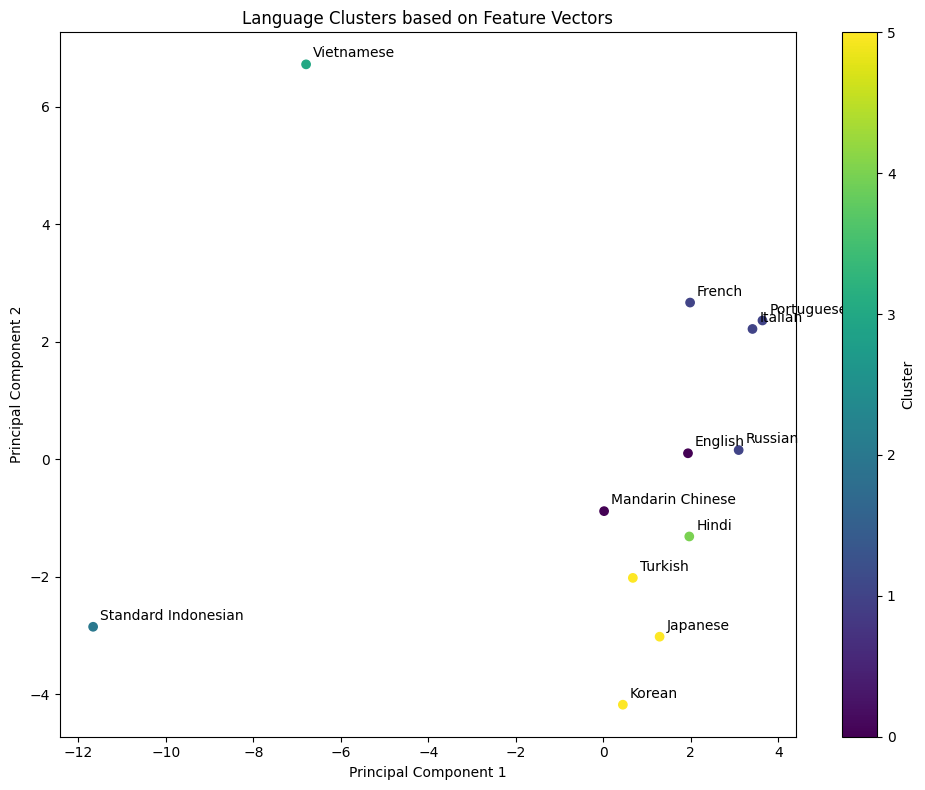


Cluster Assignments:
Hindi: Cluster 4
Standard Indonesian: Cluster 2
Italian: Cluster 1
Korean: Cluster 5
Mandarin Chinese: Cluster 0
Turkish: Cluster 5
Japanese: Cluster 5
Portuguese: Cluster 1
Russian: Cluster 1
French: Cluster 1
English: Cluster 0
Vietnamese: Cluster 3

Feature Importance (based on KMeans cluster centers):
       Cluster 0  Cluster 1  Cluster 2  Cluster 3  Cluster 4     Cluster 5
GB020        0.5       0.75        0.0        1.0        0.0  5.551115e-17
GB021        0.5       0.75        0.0       -1.0        0.0  0.000000e+00
GB022        0.5       0.75        0.0        1.0        0.0  3.333333e-01
GB023        0.0       0.00        0.0        0.0        0.0  0.000000e+00
GB024        1.0       1.00        3.0        1.0        1.0  1.333333e+00
...          ...        ...        ...        ...        ...           ...
GB433        0.0       0.25       -1.0        0.0        0.0  3.333333e-01
GB519        1.0       0.25       -1.0        0.0        0.0  3.333333e

In [123]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

n_clusters = 6  # You can adjust this number
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
clusters = kmeans.fit_predict(df_gb_langs)

# Perform PCA for visualization
pca = PCA(n_components=2)
pca_result = pca.fit_transform(df_gb_langs)

# Create a DataFrame with PCA results
pca_df = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2'], index=df_gb_langs.index)
pca_df['Cluster'] = clusters

# Visualize the clusters
plt.figure(figsize=(10, 8))
scatter = plt.scatter(pca_df['PC1'], pca_df['PC2'], c=pca_df['Cluster'], cmap='viridis')
plt.title('Language Clusters based on Feature Vectors')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

# Add language labels to the points
for i, txt in enumerate(pca_df.index):
    plt.annotate(txt, (pca_df['PC1'][i], pca_df['PC2'][i]), xytext=(5, 5), textcoords='offset points')

plt.colorbar(scatter, label='Cluster')
plt.tight_layout()
plt.show()

# Print cluster assignments
print("\nCluster Assignments:")
for lang, cluster in zip(df_gb_langs.index, clusters):
    print(f"{lang}: Cluster {cluster}")

# Print feature importance
print("\nFeature Importance (based on KMeans cluster centers):")
feature_importance = pd.DataFrame(kmeans.cluster_centers_.T, index=df_gb_langs.columns, columns=[f'Cluster {i}' for i in range(n_clusters)])
print(feature_importance)
